# Module 4

## ControlNet Scribble App

In [1]:
!uv pip install -q diffusers==0.30.0 transformers==4.44.0 accelerate controlnet_aux pillow gradio==5.49.1

In [2]:
import torch
from diffusers import ControlNetModel

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-scribble",
    torch_dtype=torch.float16
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [3]:
from diffusers import StableDiffusionControlNetPipeline

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    use_safetensors=True
)
pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.30.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Originally, I wanted to try various latest models like SD3.5, Flux, Z-Image, and Qwen Image, but I kept running into dependency errors, so I just used SD 1.5, which is the safest bet.

In [8]:
import gradio as gr
from PIL import Image

WIDTH = 512
HEIGHT = 512

def init_canvas():
    bg = Image.new("RGB", (WIDTH, HEIGHT), "black")
    return {"background": bg, "layers": [], "composite": bg}

def image_gen(editor_value, prompt, negative):
    img = editor_value.get("composite") or editor_value.get("background")
    result = pipe(
      prompt=prompt,
      negative_prompt=negative,
      image=img,
      num_inference_steps=25,
      guidance_scale=7.5,
      controlnet_conditioning_scale=1.0
    ).images[0]

    return result

demo = gr.Interface(
    fn=image_gen,
    inputs=[
        gr.ImageEditor(
            value=init_canvas,
            sources=(),
            type="pil",
            canvas_size=(WIDTH, HEIGHT),
            brush=gr.Brush(
                colors=["#FFFFFF"],
                color_mode="fixed"
            ),
            label="Draw here",
        ),
        gr.Textbox(
            label="Prompt",
            lines=2,
        ),
        gr.Textbox(
            label="Negative Prompt",
            value = "worst quality, normal quality, low quality, low res, blurry, distortion, text, watermark, logo, banner, extra digits, cropped, jpeg artifacts, error, sketch, duplicate, ugly, monochrome, horror, geometry, mutation, disgusting, bad anatomy, bad proportions, bad quality, deformed, disconnected limbs, out of frame, out of focus, dehydrated, disfigured, extra arms, extra limbs, extra hands, fused fingers, gross proportions, long neck, jpeg, malformed limbs, mutated, mutated hands, mutated limbs, missing arms, missing fingers, picture frame, poorly drawn hands, poorly drawn face, collage, pixel, pixelated, grainy, color aberration, amputee, autograph, bad illustration, beyond the borders, blank background, body out of frame, boring background, branding, cut off, dismembered, disproportioned, distorted, draft, duplicated features, extra fingers, extra legs, fault, flaw, grains, hazy, identifying mark, improper scale, incorrect physiology, incorrect ratio, indistinct, kitsch, low resolution, macabre, malformed, mark, misshapen, missing hands, missing legs, mistake, morbid, mutilated, off-screen, outside the picture, poorly drawn feet, printed words, render, repellent, replicate, reproduce, revolting dimensions, script, shortened, sign, split image, squint, storyboard, tiling, trimmed, unfocused, unattractive, unnatural pose, unreal engine, unsightly, written language, signature, username"
            lines=2,
        ),
    ],
    outputs=gr.Image(type="pil"),
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://31d260f9c88a295189.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


For the Negative Prompt, I brought the prompts I scraped together from here and there back when I was really into generating images.

### Test 1

#### Input Image

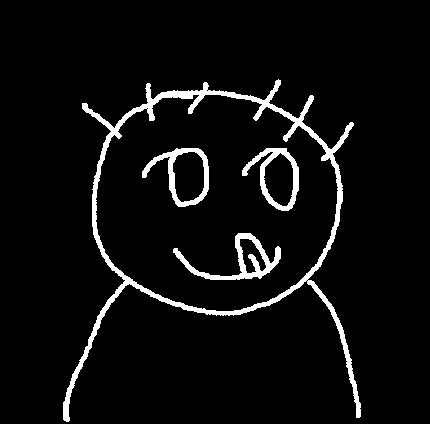

#### Output Image

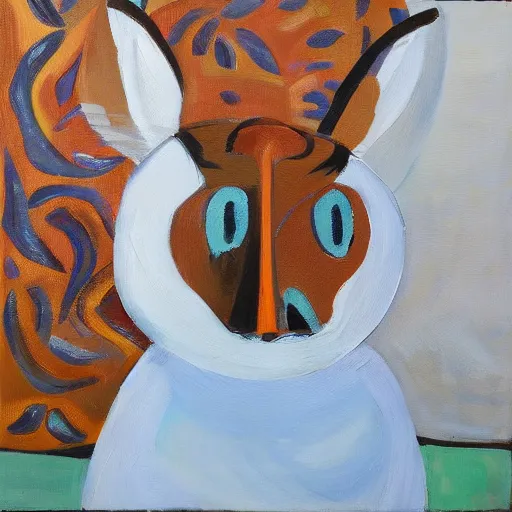

I put in the prompt 'face' and tried running it. It seems to have the talent of Picasso. 100% intended.

### Test 2

#### Input

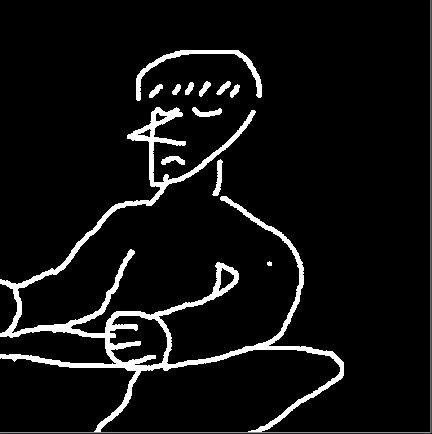

#### Output

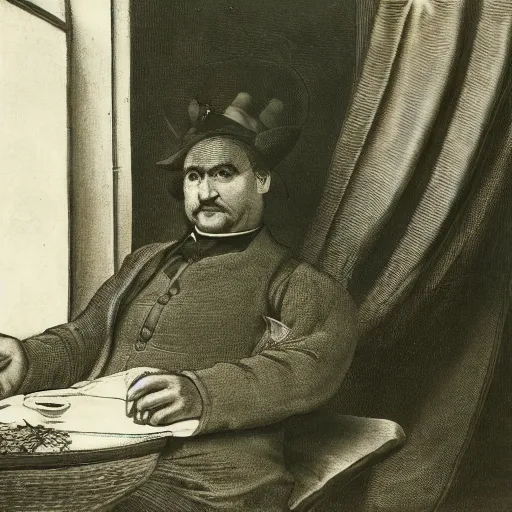

This time, I put in the prompt 'person sitting at a table' and checked it out, and I feel like it came out with a nice vibe this time.

#### Test 3

#### Input

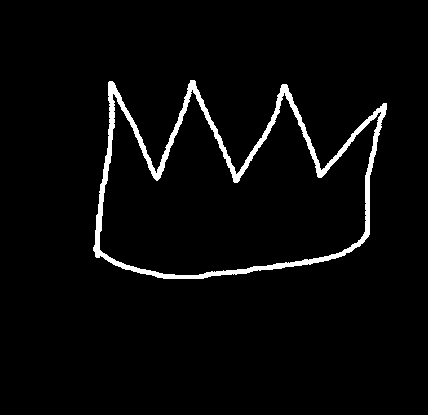

#### Output

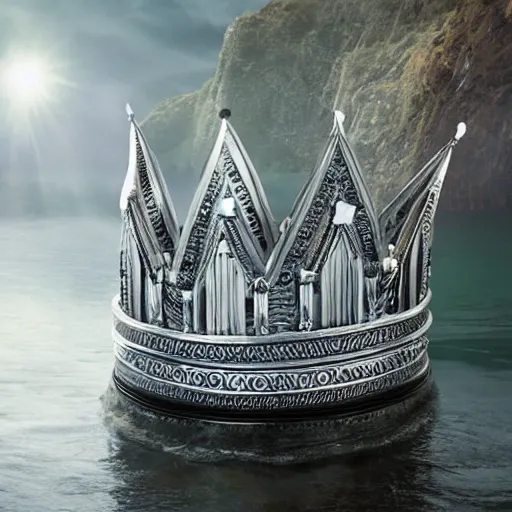

I thought non-living things would yield pretty decent results, but when I put in 'crown' as the prompt, it built an artificial castle on an island.

### Conclusion

In this module, I took a look at the feature that allows me to directly specify the shape of the image using ControlNet. I thought this was a golden opportunity to test the latest models on the latest GPUs by actively utilizing the system provided by Colab, but since I kept running into dependency errors, I had no choice but to proceed with version 1.5. The results felt a bit like an old model, but even so, I could see that the vibe of the drawing I sketched was brought to life. With the release of the Z-Image based version, there are signs that the local image ecosystem is reviving, and I'm curious to see how it would turn out if a Z-Image based ControlNet Scribble is released.